In [53]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
from scipy.io import loadmat

annots = loadmat('Datasets/wheat.mat')

df_wheat = pd.DataFrame(annots['wheat'])

df_wheat.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,702
14,0.362412,0.361825,0.361134,0.360609,0.360112,0.359721,0.359339,0.359164,0.359098,0.359243,...,1.209659,1.210886,1.212192,1.213702,1.214268,1.215435,1.215187,1.215773,13.10,12.45
35,0.377192,0.376619,0.375880,0.375341,0.374844,0.374367,0.374075,0.373826,0.373707,0.373812,...,1.209182,1.210624,1.212327,1.213457,1.213872,1.214828,1.215266,1.215728,14.28,13.19
38,0.380012,0.379461,0.378808,0.378227,0.377794,0.377372,0.376969,0.376758,0.376619,0.376771,...,1.211252,1.212775,1.214302,1.215281,1.216130,1.217018,1.217314,1.217679,13.41,13.36
41,0.332696,0.332156,0.331465,0.330848,0.330299,0.329821,0.329393,0.328973,0.328665,0.328446,...,1.013837,1.015489,1.017036,1.018236,1.019413,1.020136,1.020447,1.021025,11.09,16.94
81,0.356275,0.355716,0.355112,0.354551,0.354116,0.353746,0.353439,0.353174,0.353080,0.353187,...,1.099982,1.101652,1.102772,1.104261,1.105301,1.106350,1.106442,1.106805,12.96,15.46


In [37]:
X = df_wheat.iloc[:,:701].values
y = df_wheat.iloc[:,702].values


sc = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


y_train = sc.fit_transform(y_train.reshape(-1,1))
y_test = sc.transform(y_test.reshape(-1,1))

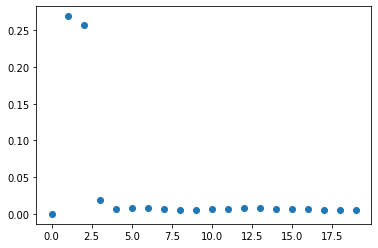

In [54]:
import warnings
warnings.filterwarnings('ignore')

pls = [0]*100
mse = [0]*100

for n in range (1,100):

    pls[n] = PLSRegression(n_components=n)
    pls[n].fit(X_train, y_train)
    mse[n] = mean_squared_error(y_test, pls[n].predict(X_test))
    #print ('Número de componentes: ', n)
    #print ('MSE: ', mean_squared_error(y_test, pls[n].predict(X_test)))
    #print ('R2: ', r2_score(y_test, pls[n].predict(X_test)))
    

plt.scatter(range(0,20), mse[:20])

In [58]:
print(annots.keys())

dict_keys(['__header__', '__version__', '__globals__', 'information', 'm5spec', 'mp5spec', 'mp6spec', 'propvals', 'm5nbs', 'mp5nbs', 'mp6nbs', 'b', 'a', 'corn_m5spec', 'd', 'corn_mp5spec', 'c', 'X1', 'Y1', 'Num_Parametro', 'smoother', 'lambda', 'dX', 'X', 'dlambda', 'nSamp', 'nVar', 'Xorig', 'Xini', 'normalize', 'centering', 'scale', 'SizeSetCal', 'SelMethod', 'decompose', 'parametro', 'y', 'yorig', 'yini', 'wavelet', 'k', 'Lmax', 'Lmax_maior', 'ycell', 'Num_Var_Sel', 'j', 'kk', 'Ldec', 'i', 'C', 'L', 'Xdec', 'nCol', 'mXdec', 'my', 'Var_Xdec', 'Var_Xdec_perc', 'ind', 'Var_Xdec_perc_decr', 'Xdec_decr', 'Var_Xdec_perc_Cum', 'jj', 'ii', 'indc', 'Xdec_red', 'nVar_red', 'nSampVal', 'nSampCal', 'Ind', 'Xcal', 'ycal', 'Xval', 'yval', 'alpha_exit', 'alpha_entry', 'var_sel', 'yhat', 'e', 'yprev', 'ytrue', 'F_array', 'Mat_Sign', 'corn_mp5'])


In [57]:
annots = loadmat('Datasets/corn_mp5.mat')

print(annots['information'])

['This data set consists of 80 samples of corn measured on    '
 '3 different NIR spectrometers. The wavelength range is      '
 '1100-2498nm at 2 nm intervals (700 channels). The moisture, '
 'oil, protein and starch values for each of the samples is   '
 'also included. A number of NBS glass standards were also    '
 'measured on each instrument. The data was originally taken  '
 'at Cargill. Many thanks for Mike Blackburn for letting us   '
 'distribute it.                                              '
 '                                                            '
 'The variables in this data set are described below:         '
 '   information: [20x59  char  ] This field                  '
 '        m5spec: [80x700 dataset] Spectra on instrument m5   '
 '       mp5spec: [80x700 dataset] Spectra on instrument mp5  '
 '       mp6spec: [80x700 dataset] Spectra on instrument mp6  '
 '      propvals: [80x4   dataset] Property values for samples'
 '         m5nbs: [ 3x700 dataset] NBS g